1. Perform a 10-fold Cross-Validation for SVC on BostonHousing_full.csv data using Pipeline. Specifically,

             (i) report average accuracy, confusion matrix, precision, recall, and F1 score; and

            (ii) use grid search to find the best C from C = [1, 5, 10, 50, 100, 500, 1000].

2. Load salary1.arff file and convert record array to Dataframe and byte string to string. Build an SVR model, Plot the data, SVR and regression models.

3. What is Weighted Nearest Neighbor Model? Explain briefly.

In [1]:
import pandas as pd
from matplotlib import style
from matplotlib import pyplot as plt
#import graphviz as gr
%matplotlib inline
style.use("fivethirtyeight")
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 60)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

Mounted at /content/drive


In [2]:
# Load BostonHousing_full.csv file and convert record array to dataframe and byte string to string
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/DataMining/Files/BostonHousing_full.csv')

In [3]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


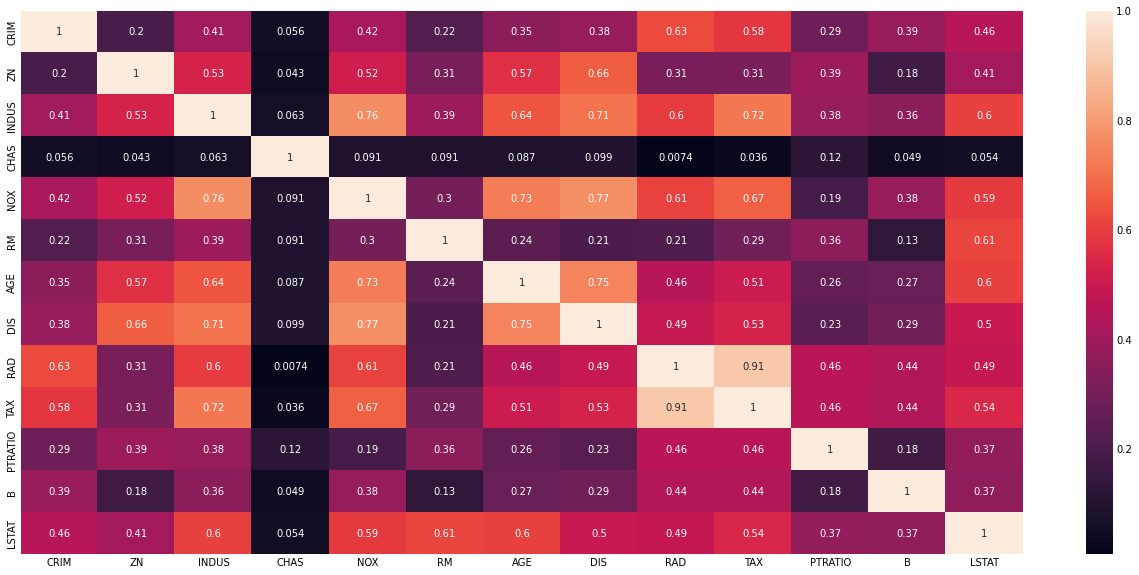

In [4]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

From correlation matrix, we see TAX and RAD are highly correlated features. 

In [5]:
rawdf = pd.DataFrame.from_records(data)
#rawdf['CATMEDV'] = rawdf['CATMEDV'].str.decode('utf-8') # convert byte string to string
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  CATMEDV  506 non-null    object 
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB


In [6]:
rawdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CATMEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,low
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,low
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,high
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,high
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,low
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,low
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,low
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,low


In [7]:
rawdf.replace({'CATMEDV':{'low':0,'high':1}}, inplace = True)

In [8]:
# Build SVC model
X = rawdf.drop (['CATMEDV','RAD','TAX','CHAS'], axis='columns')
y = rawdf['CATMEDV']

In [9]:
X.head(3)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,17.8,392.83,4.03


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   PTRATIO  506 non-null    float64
 8   B        506 non-null    float64
 9   LSTAT    506 non-null    float64
dtypes: float64(10)
memory usage: 39.7 KB


In [11]:
y.head(3)

0    0
1    0
2    1
Name: CATMEDV, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
#Splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# 10-fold cross validation - using cross_val_score

# Pipelines to normalize numeric values and build SVM classifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler #for normalization
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV #for figuring out the best parameters from the listed hyperparameters
#gridsearchCV automates the manual process of having to test various values/ types of "C", "epsilon", "gamma", and "kernel" and choose the best

#scaler = MinMaxScaler()


svc1 = SVC(C=[1, 5, 10, 50, 100, 500, 1000], kernel='linear')
#svc1 = SVC(C=[0.1], kernel='linear')

svc_pipe=Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('svc', SVC(C=[1, 5, 10, 50, 100, 500, 1000], kernel='linear'))]) #creating a pipeline



param_grid = {'svc__C':[1, 5, 10, 50, 100, 500, 1000],'svc__gamma':[1,0.1,0.01,0.001,0.0001], 'svc__kernel':['linear']} #setting up a parameter grid

grid_search = GridSearchCV(estimator=svc_pipe, param_grid=param_grid, cv=10, scoring="neg_mean_squared_error")


grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(C=[1, 5, 10, 50, 100, 500, 1000],
                                            kernel='linear'))]),
             param_grid={'svc__C': [1, 5, 10, 50, 100, 500, 1000],
                         'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svc__kernel': ['linear']},
             scoring='neg_mean_squared_error')

In [14]:
grid_search.best_params_ #use grid search to find the best C from C = [1, 5, 10, 50, 100, 500, 1000]

{'svc__C': 50, 'svc__gamma': 1, 'svc__kernel': 'linear'}

The best C from C = [1, 5, 10, 50, 100, 500, 1000] is C=50

In [15]:
grid_search.best_score_ #best score out of all the scores of multilple train test splits 

-0.04695121951219512

In [16]:
grid_search.best_estimator_.steps[-1][1].coef_

array([[  3.24255609,   0.89305404,  -2.35445643,   0.63743685,
         10.37926746,   0.92304309,  -1.88273637,  -3.42418396,
          5.17269506, -10.99058788]])

Confusion Matrix

In [17]:
grid_pred=grid_search.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, grid_pred)
print(confusion_matrix)

#Confusion Matrix

[[86  4]
 [ 3  9]]


Precision, Recall, F1 score

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_pred))

#avg precision, recall, f1-score

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.69      0.75      0.72        12

    accuracy                           0.93       102
   macro avg       0.83      0.85      0.84       102
weighted avg       0.93      0.93      0.93       102



Load salary1.arff file and convert record array to Dataframe and byte string to string. Build an SVR model, Plot the data, SVR and regression models.

In [19]:
# Load salary1.arff file and convert record array to dataframe and byte string to string
import pandas as pd
import numpy as np
from scipy.io import arff
data, meta = arff.loadarff('/content/drive/MyDrive/DataMining/Files/salary1.arff')
print(data,meta)

[(10., 33.) (12., 36.) (12., 50.) (13., 51.) (14., 42.) (14., 45.)
 (15., 59.) (16., 49.) (16., 60.) (17., 72.) (18., 69.) (20., 77.)] Dataset: salary1
	education's type is numeric
	salary's type is numeric



Byte string conversion is not needed as the data is numerical and not categorical

In [20]:
rawdf1 = pd.DataFrame.from_records(data)
rawdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   education  12 non-null     float64
 1   salary     12 non-null     float64
dtypes: float64(2)
memory usage: 320.0 bytes


In [21]:
rawdf1

,education,salary
0,10.0,33.0
1,12.0,36.0
2,12.0,50.0
3,13.0,51.0
4,14.0,42.0
5,14.0,45.0
6,15.0,59.0
7,16.0,49.0
8,16.0,60.0
9,17.0,72.0


In [22]:
# Build SVR model
X = rawdf1.drop('salary', axis='columns')
y = rawdf1['salary']

Evaluation of SVR with Pipeline

In [23]:
# Pipelines to normalize numeric values and build SVM classifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

#parameters = {'C':[1,5,10,50,100,500,1000], 'epsilon':[0.05, 0.1, 0.15, 0.2]}
#parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.05, 0.1, 0.15, 0.2]}
#parameters = {'kernel': ('linear'), 'C':[1,5,10,50,100,500,1000], 'epsilon':[0.05, 0.1, 0.15, 0.2]}
#svr = SVR()
#clf = GridSearchCV(svr, parameters)
#clf.fit(X,y)
#clf.best_params_



svr_pipe = Pipeline([('scaler', MinMaxScaler()), ('linear_svr', SVR(epsilon=5, kernel='linear'))])
#svr_pipe = Pipeline([('scaler', MinMaxScaler()), ('linear_svr', SVR(kernel='linear', gamma=1.0E-12))])
#svr_pipe = Pipeline([('scaler', MinMaxScaler()), ('linear_svr', SVR(kernel='poly'))])

#svr.fit(X, y)


In [24]:
# 10-fold cross validation - using cross_val_score
from sklearn.model_selection import GridSearchCV
#param_grid = {'linear_svr__kernel': ('linear', 'rbf','poly'), 'linear_svr__C': [1,5,10,50,100,500,1000], 'linear_svr__epsilon': [0.05, 0.1, 0.15, 0.2], 'linear_svr__gamma':[1e-7, 1e-4, 1.0E-12]}
param_grid = {'linear_svr__C': [1,5,10,50,100,500,1000], 'linear_svr__epsilon': [0.05, 0.1, 0.15, 0.2]}
#param_grid = {'linear_svr__C': [5], 'linear_svr__epsilon': [0.15]}
grid_search = GridSearchCV(svr_pipe, param_grid, cv=10, scoring="neg_mean_squared_error")
#grid_search = GridSearchCV(svr_pipe, param_grid, cv=10)
grid_search.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('linear_svr',
                                        SVR(epsilon=5, kernel='linear'))]),
             param_grid={'linear_svr__C': [1, 5, 10, 50, 100, 500, 1000],
                         'linear_svr__epsilon': [0.05, 0.1, 0.15, 0.2]},
             scoring='neg_mean_squared_error')

In [25]:
grid_search.best_params_

{'linear_svr__C': 500, 'linear_svr__epsilon': 0.2}

Best C = 500

In [26]:
grid_search.best_score_

-44.765445826752824

In [27]:
grid_search.best_estimator_.steps[-1][1].coef_

array([[44.33335644]])

In [28]:
import math
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
pred_y=grid_search.predict(X)

#score=grid_search.score(X,y)
#print(score)

mse=mean_squared_error(y, pred_y)
#print("Mean Squared Error:",mse)
rmse=math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mse=mean_absolute_error(y, pred_y)
#mse=mean_absolute_error(y, pred_y, multioutput='raw_values')
print("Mean Absolute Error:",mse)

Root Mean Squared Error: 5.955662955967093
Mean Absolute Error: 4.736110148390507


In [29]:
# print(grid_search.cv_results_)
cvresult = grid_search.cv_results_
for mean_test_score, params in zip(cvresult['mean_test_score'], cvresult['params']):
    print(mean_test_score, params)

-210.87766415458918 {'linear_svr__C': 1, 'linear_svr__epsilon': 0.05}
-210.87766415458918 {'linear_svr__C': 1, 'linear_svr__epsilon': 0.1}
-210.87766415458918 {'linear_svr__C': 1, 'linear_svr__epsilon': 0.15}
-210.87766415458918 {'linear_svr__C': 1, 'linear_svr__epsilon': 0.2}
-143.80891615596414 {'linear_svr__C': 5, 'linear_svr__epsilon': 0.05}
-144.29704129798338 {'linear_svr__C': 5, 'linear_svr__epsilon': 0.1}
-145.101853895884 {'linear_svr__C': 5, 'linear_svr__epsilon': 0.15}
-145.98310389692713 {'linear_svr__C': 5, 'linear_svr__epsilon': 0.2}
-106.92418826955557 {'linear_svr__C': 10, 'linear_svr__epsilon': 0.05}
-107.1160632695556 {'linear_svr__C': 10, 'linear_svr__epsilon': 0.1}
-107.30918826955558 {'linear_svr__C': 10, 'linear_svr__epsilon': 0.15}
-107.5035632695556 {'linear_svr__C': 10, 'linear_svr__epsilon': 0.2}
-52.10914371869321 {'linear_svr__C': 50, 'linear_svr__epsilon': 0.05}
-52.253526353640936 {'linear_svr__C': 50, 'linear_svr__epsilon': 0.1}
-52.40436397070433 {'linea

In [30]:
# Build SVR model
X = rawdf1.drop('salary', axis='columns')
y = rawdf1['salary']

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X,y)

LinearRegression()

In [34]:
y_reg = lm.predict(X)

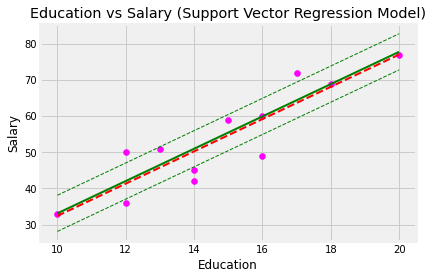

In [35]:
regression = SVR(kernel='linear')
regression.fit(X,y)

#Split dataset to be input here 
svr_result = regression.predict(X)

plt.scatter(X, y, color = 'magenta')
plt.plot(X, svr_result+5, 'g--', color = 'green',linewidth=1)
plt.plot(X, svr_result,'k-', color = 'green',linewidth=2)
plt.plot(X, svr_result-5,'g--', color = 'green',linewidth=1)
plt.plot(X, y_reg,'r--', color = 'red',linewidth=2)
plt.title('Education vs Salary (Support Vector Regression Model)')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.show()



As the dataset is small we could see regression line is matching the SVM line

What is Weighted Nearest Neighbor Model? Explain briefly.

Weighted kNN is a modified version of k nearest neighbors. One of the many issues that affect the performance of the kNN algorithm is the choice of the hyperparameter k. If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes.
Another issue is the approach to combining the class labels. The simplest method is to take the majority vote, but this can be a problem if the nearest neighbors vary widely in their distance and the closest neighbors more reliably indicate the class of the object.

Let's consider the below training set

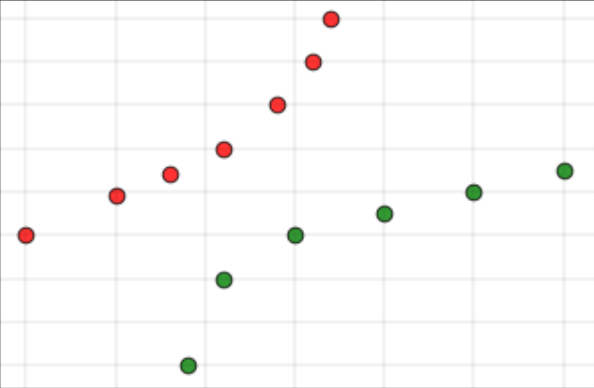

The red labels indicate the class 0 points and the green labels indicate class 1 points.
Let's consider the white point as the query point( the point whose class label has to be predicted)

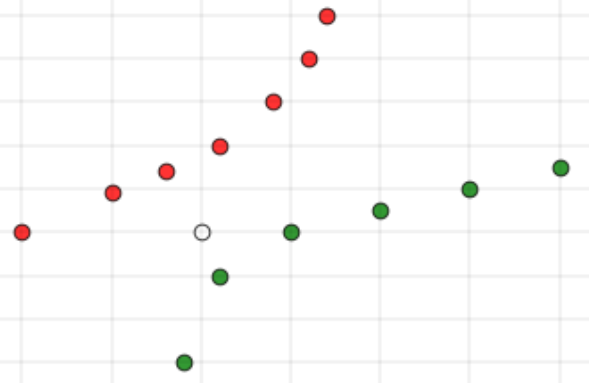

If we give the above dataset to a kNN based classifier, then the classifier would declare the query point to belong to the class 0. But in the plot, it is clear that the point is more closer to the class 1 points compared to the class 0 points. To overcome this disadvantage, weighted kNN is used. In weighted kNN, the nearest k points are given a weight using a function called as the kernel function. The intuition behind weighted kNN, is to give more weight to the points which are nearby and less weight to the points which are farther away. Any function can be used as a kernel function for the weighted knn classifier whose value decreases as the distance increases. The simple function which is used is the inverse distance function which implies that as the distance increases weight decreases and as the distance decreases, weight increases.